In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import os
import numpy as np

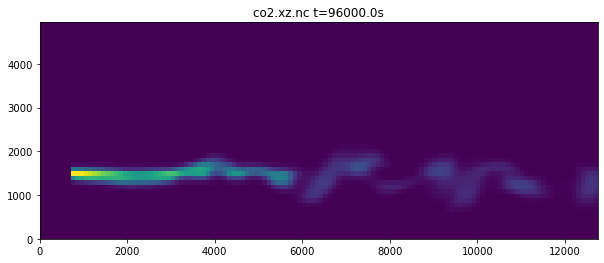

Frame 961/961
Done with co2.xz.nc
Making video...
Done with co2.xz.nc video.


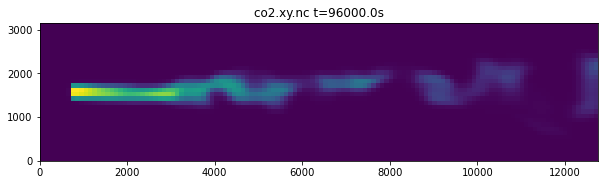

Frame 961/961
Done with co2.xy.nc
Making video...
Done with co2.xy.nc video.


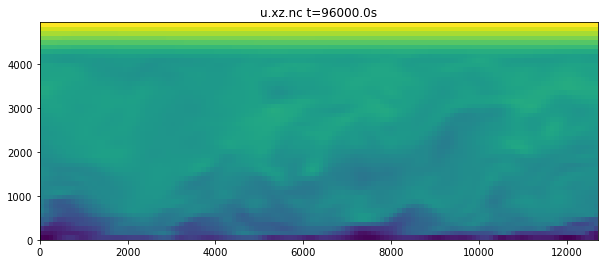

Frame 961/961
Done with u.xz.nc
Making video...
Done with u.xz.nc video.


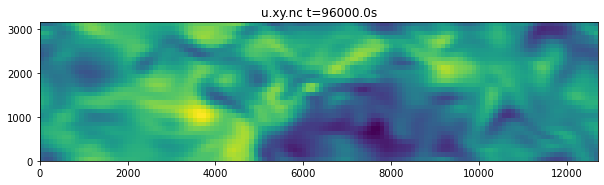

Frame 961/961
Done with u.xy.nc
Making video...
Done with u.xy.nc video.


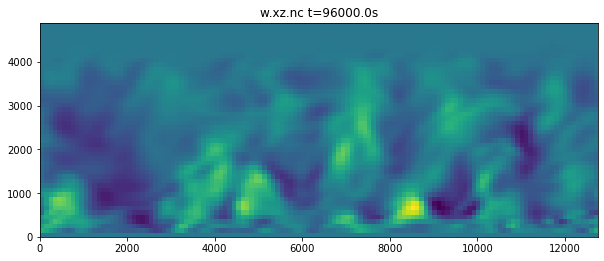

Frame 961/961
Done with w.xz.nc
Making video...
Done with w.xz.nc video.


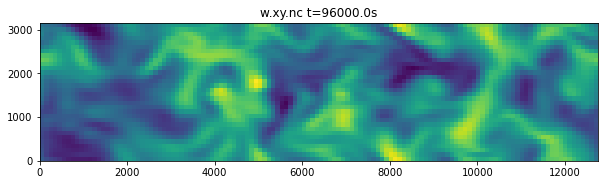

Frame 961/961
Done with w.xy.nc
Making video...
Done with w.xy.nc video.


In [5]:
datasets = {}

for name in ["co2", "u", "w"]:
    for plane in ["xz", "xy"]:
        fname = name + "." + plane + ".nc"
        napl = name + "_" + plane
        datasets[napl] = nc.Dataset(fname)
        # continue
        plt.figure(figsize=(10, 10))
        plt.title(fname + " t=" + str(datasets[napl]["time"][-1]) + "s")
        dims = datasets[napl].dimensions
        if plane == "xz":
            max_x = np.round(datasets[napl]["x" if "x" in dims else "xh"][-1])
            max_z = np.round(datasets[napl]["z" if "z" in dims else "zh"][-1])
            plt.imshow(
                datasets[napl][name][-1, :, 0, :],
                origin="lower",
                extent=[ 0, max_x, 0, max_z],
            )
        elif plane == "xy":
            max_x = np.round(datasets[napl]["x" if "x" in dims else "xh"][-1])
            max_y = np.round(datasets[napl]["y" if "y" in dims else "yh"][-1])
            plt.imshow(
                datasets[napl][name][-1, 0, :, :],
                origin="lower",
                extent=[ 0, max_x, 0, max_y],
            )
        plt.show()

        # continue
        for t in range(len(datasets[napl]["time"])):
            print(f"\rFrame {t+1}/{len(datasets[name + '_' + plane]['time'])}", end="")
            plt.figure(figsize=(10, 10))
            plt.title(fname + " t=" + str(datasets[napl]["time"][t]) + "s")
            dims = datasets[napl].dimensions
            if plane == "xz":
                max_x = np.round(datasets[napl]["x" if "x" in dims else "xh"][-1])
                max_z = np.round(datasets[napl]["z" if "z" in dims else "zh"][-1])
                plt.imshow(
                    datasets[napl][name][t, :, 0, :],
                    origin="lower",
                    extent=[ 0, max_x, 0, max_z],
                )
            elif plane == "xy":
                max_x = np.round(datasets[napl]["x" if "x" in dims else "xh"][-1])
                max_y = np.round(datasets[napl]["y" if "y" in dims else "yh"][-1])
                plt.imshow(
                    datasets[napl][name][t, 0, :, :],
                    origin="lower",
                    extent=[0, max_x, 0, max_y],
                )
            # add axis labels
            plt.xlabel("x")
            if plane == "xz":
                plt.ylabel("z")
            elif plane == "xy":
                plt.ylabel("y")
            # add tick marks
            plt.savefig(f"frames/{name}_{plane}_{t:04d}.png")
            plt.close()

        print()
        print("Done with " + fname)
        print("Making video...")

        if os.path.isfile(f"{name}_{plane}.mp4"):
            # overwrite = input("Overwrite " + fname + "? [y/n] ")
            overwrite = "y"
            if overwrite == "y":
                !rm {name}_{plane}.mp4 > /dev/null 2>&1
                !ffmpeg -framerate 10 -i frames/{name}_{plane}_%04d.png -c:v libx264 -r 30 -pix_fmt yuv420p {name}_{plane}.mp4 > /dev/null 2>&1
            else:
                print("Skipping " + fname)
        else:
            !ffmpeg -framerate 10 -i frames/{name}_{plane}_%04d.png -c:v libx264 -r 30 -pix_fmt yuv420p {name}_{plane}.mp4 > /dev/null 2>&1

        print("Done with " + fname + " video.")

In [3]:
# export data as npy
for name in ["co2", "u", "w"]:
    for plane in ["xz", "xy"]:
        napl = name + "_" + plane
        np.save(napl, np.array(datasets[napl][name][:]))
        print(f"Saved {napl}.npy")

Saved co2_xz.npy
Saved co2_xy.npy
Saved u_xz.npy
Saved u_xy.npy
Saved w_xz.npy
Saved w_xy.npy
